In [1]:

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line to install the package
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line to install the package
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
dataset_path=r'********PycharmProjects\Python Scripts\DataAnalysis_Basics\input datasets'

In [300]:
#Read table from Wikipedia page and store it as pandas dataframe
import pandas as pd
import requests

from bs4 import BeautifulSoup

req = requests.get("https://en.wikipedia.org/wiki/Local_government_areas_of_New_South_Wales#Greater_metropolitan_Sydney")

## another link to list of NSW Councils: https://www.lgnsw.org.au/about-us/nsw-council-links
#link to wiki "https://en.wikipedia.org/wiki/List_of_local_government_areas_in_New_South_Wales"
#https://en.wikipedia.org/wiki/Local_government_areas_of_New_South_Wales#Greater_metropolitan_Sydney
soup = BeautifulSoup(req.content,'lxml')

table = soup.find_all('table')[2]

df = pd.read_html(str(table))

df1=pd.DataFrame(df[0])
df1.rename(columns={ df1.columns[0]: "LGA"}, inplace=True)
df1.drop([1,2,3,4,5,6,7,8],axis=1,inplace= True)#drop second column
df1.drop([0,1],inplace=True)
df1.reset_index()
df1.head(31)
df2=df1.loc[2:61,'LGA']
df2=df1.reset_index()
df2.head()
df2.loc[0:5,'LGA']



0             Bayside Council
1          Blacktown, City of
2    Burwood, Municipality of
3              Camden Council
4       Campbelltown, City of
5         Canada Bay, City of
Name: LGA, dtype: object

In [4]:
# Create Dataframe with Council Names
##define the dataframe columns
column_names = ['LGA_GreaterSydney', 'Latitude', 'Longitude'] 

# instantiate the dataframe
LGA_df = pd.DataFrame(columns=column_names)

for line in range(0,df2.shape[0]):
    lga_name = df2.loc[line,'LGA']
       
    LGA_df = LGA_df.append({'LGA_GreaterSydney': lga_name,
                            'Latitude': '',
               'Longitude': ''}, ignore_index=True)


LGA_df

,LGA_GreaterSydney,Latitude,Longitude
0,Bayside Council,,
1,"Blacktown, City of",,
2,"Burwood, Municipality of",,
3,Camden Council,,
4,"Campbelltown, City of",,
5,"Canada Bay, City of",,
6,"Canterbury-Bankstown, City of",,
7,Cumberland Council,,
8,"Fairfield, City of",,
9,Georges River Council,,


In [84]:
# section to generate single latitude and longitude by giving an address (either LGA or suburb)
address = 'Cumberland City Council, NSW'

geolocator = Nominatim(user_agent="NSW_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of {} are {}, {}.'.format(address,latitude, longitude))

The geograpical coordinates of Cumberland City Council, NSW are -33.8341646, 151.0621233.


In [6]:
#function that reads address to give out coordinates
def geolocate(address):
    try:
        geolocator = Nominatim(user_agent="NSW_agent")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        coords="{} {}".format(latitude,longitude)
    except:
        coords="couldn't geocode"
    return coords

In [ ]:
#Reading brand new lat long from geocoding by feeding LGA names as inputs...
i=-1
for address in LGA_df.loc[0:10,'LGA_GreaterSydney']:
    i=i+1
    latlong=geolocate(address)
    print(address, latlong.split(" ")[0])
    LGA_df.iloc[i, LGA_df.columns.get_loc('Latitude')] = latlong.split(" ")[0]
    LGA_df.iloc[i, LGA_df.columns.get_loc('Longitude')] = latlong.split(" ")[1]
    
##LGA_df.to_csv(dataset_path+ r'\NSW_Geospatial_Coordinates_Capstone1.csv') #uncomment to populate new lat long from geocoder

In [ ]:
suburb_df= pd.read_csv(dataset_path+ r'\suburb_toget_coordinates.csv')
suburb_df.head()

In [ ]:
#Reading coordinates for suburbs...
i=-1
for address in suburb_df.loc[0:2,'Key']: ##remove range to run through all rows
    i=i+1
    latlong=geolocate(address)
    print(address, latlong.split(" ")[0])
    
    suburb_df.iloc[i, suburb_df.columns.get_loc('Latitude')] = latlong.split(" ")[0]
    suburb_df.iloc[i, suburb_df.columns.get_loc('Longitude')] = latlong.split(" ")[1]
    
#suburb_df.to_csv(dataset_path+ r'\NSW_Suburbs_Coordinates_Capstone.csv') #uncomment to populate new lat long from geocoder

In [302]:
#Read LGA Dataframe from stored file (prepared from above geocoder )
LGA_df=pd.read_csv(dataset_path+ r'\NSW_Geospatial_Coordinates_Capstone.csv')
LGA_df

,LocalGovernmentArea,Latitude,Longitude,LGA Name,Greater Sydney
0,ALBURY,-36.014806,146.982172,Albury City Council,No
1,ARMIDALE REGIONAL,-30.412505,151.940140,Armidale Regional Council,No
2,BALLINA,-28.852685,153.490625,Ballina Shire Council,No
3,BALRANALD,-34.043943,143.706765,Balranald Shire Council,No
4,BATHURST REGIONAL,-33.474707,149.641320,Bathurst Regional Council,No
5,BAYSIDE,-33.964578,151.199091,Bayside Council,Yes
6,BEGA VALLEY,-36.816425,149.711855,Bega Valley Shire Council,No
7,BELLINGEN,-30.373991,152.719210,Bellingen Shire Council,No
8,BERRIGAN,-35.751482,145.660121,Berrigan Shire Council,No
9,BLACKTOWN,-33.740189,150.864835,Blacktown City Council,Yes


In [8]:
#Read GreaterSydney Suburb Data
suburb_df=pd.read_csv(dataset_path+ r'\NSW_Suburbs_Coordinates_Capstone.csv')
suburb_df.drop(['MB_CODE_2016','SSC_CODE_2016','STATE_CODE_2016','STATE_NAME_2016','AREA_ALBERS_SQKM'],axis=1, inplace =True)
suburb_df.rename(columns={ suburb_df.columns[0]: "Suburb"}, inplace=True)
suburb_df.head()

,Suburb,LocalGovernmentArea,GreaterSydney,Latitude,Longitude
0,Thurgoona,ALBURY,No,-36.045146,146.991899
1,East Albury,ALBURY,No,-36.083604,146.930137
2,Wirlinga,ALBURY,No,-36.048024,147.055984
3,Lake Hume Village,ALBURY,No,-36.102482,147.036795
4,North Albury,ALBURY,No,-36.056897,146.927665


In [10]:
##Filter out suburbs in Greater Sydney only
suburb_df_greatersyd=suburb_df[suburb_df['GreaterSydney']=="Yes"]

suburb_df_try=suburb_df_greatersyd[0:5]
suburb_df_try.head(30)

,Suburb,LocalGovernmentArea,GreaterSydney,Latitude,Longitude
303,Blacktown,BLACKTOWN,Yes,-33.740189,150.864835
304,Kings Park (NSW),BLACKTOWN,Yes,-33.743333,150.908611
305,Acacia Gardens,BLACKTOWN,Yes,-33.732459,150.912532
306,Quakers Hill,BLACKTOWN,Yes,-33.734444,150.878889
307,Marayong,BLACKTOWN,Yes,-33.749167,150.891944


In [11]:
print ('Greater Sydney Suburbs in Data: ',suburb_df_greatersyd.shape[0])

Greater Sydney Suburbs in Data:  671


In [15]:
df_crime=pd.read_excel(dataset_path + r'\LGA_trends_CrimeData_2014-2019.xlsx',header=3)


# Get names of indexes for which column crime rate has value others and nc
indexNames = df_crime[df_crime['OffenceCategory'] =='Others' ].index
df_crime.drop(indexNames , inplace=True)# Delete these row indexes from dataFrame
indexNames = df_crime[df_crime['Rate per 100,000 population Oct 2018 - Sep 2019'] =='nc' ].index
df_crime.drop(indexNames , inplace=True)# Delete these row indexes from dataFrame


df_crime=df_crime.dropna()
df_crime.head(10)


,LocalGovernmentArea,OffenceCategory,Oct 2014 - Sep 2015,Oct 2015 - Sep 2016,Oct 2016 - Sep 2017,Oct 2017 - Sep 2018,Oct 2018 - Sep 2019,"Rate per 100,000 population Oct 2018 - Sep 2019",CrimeRate(per100000),2 year trend and annual percent change (Oct 2017-Sep 2019),5 year trend and average annual percent change (Oct 2014-Sep 2019)
19,COONAMBLE,Violence_Assault,53,57,46,56,107,2654.4,7591.2,Stable,Up 19.2%
44,WALGETT,Violence_Assault,183,128,146,153,133,2148.6,5735.0,Stable,Stable
48,MOREE PLAINS,Robbery_Stealing,7,5,14,13,4,29.7,5360.1,nc,nc
69,SYDNEY,Robbery_Stealing,249,197,183,198,205,88,4491.6,Stable,Stable
76,COONAMBLE,BreakingandEntering,101,113,102,88,131,3249.8,4266.9,Up 48.9%,Stable
79,DUBBO REGIONAL,Robbery_Stealing,12,9,8,7,12,23,4102.6,nc,nc
83,MOREE PLAINS,Violence_Assault,249,252,235,194,175,1301,3999.7,Stable,Down 8.4%
84,NARROMINE,Robbery_Stealing,0,1,2,3,1,15.2,3952.5,nc,nc
88,BROKEN HILL,Violence_Assault,191,170,155,195,227,1270.1,3704.0,Stable,Stable
100,ALBURY,Robbery_Stealing,14,12,8,12,22,41.5,3480.7,nc,nc


In [248]:
#preparing most common type of crime per LGA
df_crime.sort_values(by=['CrimeRate(per100000)'],ascending=False,inplace = True)
df_crime.sort_values(by=['LocalGovernmentArea'],inplace = True)
df_crime.head(20)
pivot_df_crime=df_crime.pivot(index='LocalGovernmentArea', columns='OffenceCategory', values='CrimeRate(per100000)')

#pivot_df_crime
df_crime_new=pivot_df_crime.reset_index()
df_crime_new.replace(np.nan,0,inplace=True) #replace NaNs with Zeros

df_crime_new['CrimeRateTotal']=df_crime_new['BreakingandEntering']+df_crime_new['Robbery_Stealing']+df_crime_new['Violence_Assault']
df_crime_new.head(100)


OffenceCategory,LocalGovernmentArea,BreakingandEntering,Murder_AttemptedMurder,Robbery_Stealing,Violence_Assault,CrimeRateTotal
0,ALBURY,1063.3,0.0,3480.7,2035.9,6579.9
1,ARMIDALE REGIONAL,1186.5,0.0,2765.2,2095.2,6046.9
2,BALLINA,559.2,0.0,1530.3,959.4,3048.9
3,BATHURST REGIONAL,652.2,0.0,1596.6,1755.4,4004.2
4,BAYSIDE,242.8,0.0,1312.2,946.5,2501.5
5,BEGA VALLEY,384.1,2.9,1102.4,947.0,2433.5
6,BELLINGEN,463.5,0.0,0.0,1066.0,1529.5
7,BERRIGAN,623.2,0.0,0.0,750.2,1373.4
8,BLACKTOWN,488.7,1.1,2005.1,1646.5,4140.3
9,BLAND,367.5,0.0,0.0,1119.5,1487.0


In [23]:
##Read Population File
df_population=pd.read_excel(dataset_path+ r'\Population_2017-18_ABS.xlsx',sheet_name = 'LGA NSW Table 1',header=7)
df_population.drop(['Unnamed: 4','Unnamed: 7','Unnamed: 11'],axis =1, inplace = True)
df_population.rename(columns={df_population.columns[2]: "2017Population", df_population.columns[3]: "2018Population"}, inplace=True)
df_population.sort_values(by='2018Population', ascending= False, inplace = True)
df_population.head(20)

,LGA code,LocalGovernmentArea,2017Population,2018Population,2017-2018 inc,2017-2018 %,Natural increase,Net internal migration,Net overseas migration,Area km2,Population density 2018 persons/km2
0,11570,CANTERBURY-BANKSTOWN,368409,373931,5522,1.5,3877,-3970,5615,110.2,3392.1
1,10750,BLACKTOWN,357839,366534,8695,2.4,4589,-361,4467,240.0,1526.9
2,11650,CENTRAL COAST,339394,342047,2653,0.8,762,517,1374,1681.1,203.5
3,15990,NORTHERN BEACHES,268870,271278,2408,0.9,1627,-1928,2709,254.2,1067.2
4,16260,PARRAMATTA,243557,251311,7754,3.2,2815,-1866,6805,83.8,2997.9
5,17200,SYDNEY,233177,240229,7052,3.0,1781,-2840,8111,26.7,8982.9
6,12380,CUMBERLAND,231725,236893,5168,2.2,3269,-3714,5613,71.6,3310.8
7,17150,SUTHERLAND SHIRE,227695,229213,1518,0.7,1298,-1087,1307,333.6,687.1
8,14900,LIVERPOOL,217788,223304,5516,2.5,2769,681,2066,305.7,730.4
9,18450,WOLLONGONG,213281,216071,2790,1.3,999,-349,2140,684.0,315.9


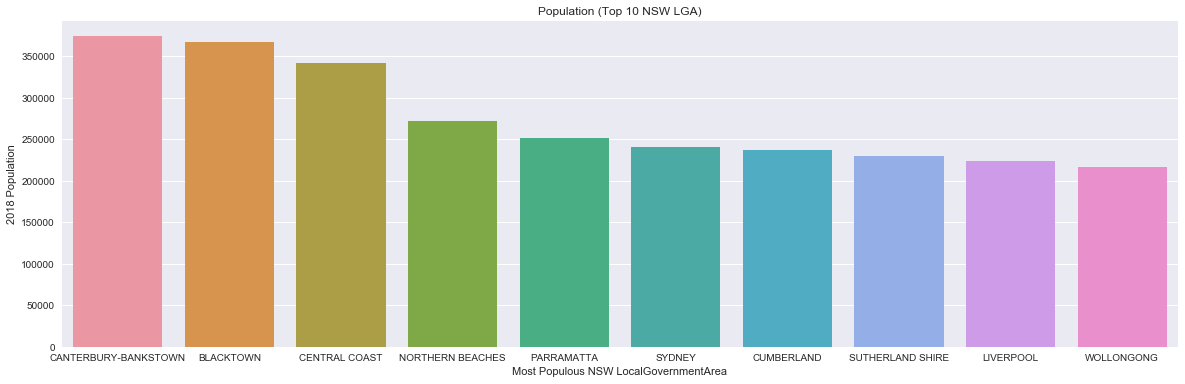

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(20,6))
ax1 = sns.barplot(x="LocalGovernmentArea", y="2018Population", data=df_population.head(10))
ax1.set(xlabel="Most Populous NSW LocalGovernmentArea", ylabel = "2018 Population",title = "Population (Top 10 NSW LGA)")

plt.show()

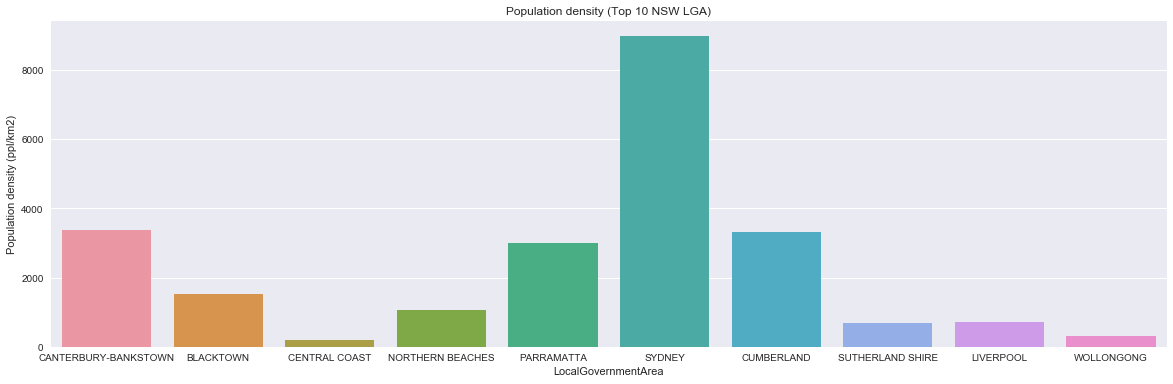

In [104]:
fig, ax2 = plt.subplots(figsize=(20,6))
ax2 = sns.barplot(x="LocalGovernmentArea", y="Population density 2018 persons/km2", data=df_population.head(10))
ax2.set(xlabel="LocalGovernmentArea", ylabel = "Population density (ppl/km2)", title="Population density (Top 10 NSW LGA)")
plt.figure(figsize=(30, 10))
plt.show()

In [303]:
selectedLGAs = ['CUMBERLAND','PARRAMATTA', 'CANTERBURY-BANKSTOWN','SYDNEY']

LGAs_selected_df=suburb_df_greatersyd[suburb_df_greatersyd.LocalGovernmentArea.isin(selectedLGAs)]
Selected_Councils_df=LGA_df[LGA_df.LocalGovernmentArea.isin(selectedLGAs)]

LGAs_selected_df.rename(columns={LGAs_selected_df.columns[0]:"Neighborhood"},inplace = True)

print('we have {} suburbs/neighborhoods'.format(LGAs_selected_df.shape[0]))
LGAs_selected_df.head(109)

we have 110 suburbs/neighborhoods


C:\Users\riaz\Anaconda3\lib\site-packages\pandas\core\frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,Neighborhood,LocalGovernmentArea,GreaterSydney,Latitude,Longitude
617,Georges Hall,CANTERBURY-BANKSTOWN,Yes,-33.910111,150.987992
618,Bass Hill,CANTERBURY-BANKSTOWN,Yes,-33.898625,150.997448
619,Yagoona,CANTERBURY-BANKSTOWN,Yes,-33.903791,151.017668
620,Bankstown Aerodrome,CANTERBURY-BANKSTOWN,Yes,-33.923500,150.990100
621,Villawood,CANTERBURY-BANKSTOWN,Yes,-33.885724,150.983751
622,Lansdowne (Canterbury-Bankstown - NSW),CANTERBURY-BANKSTOWN,Yes,-33.894869,150.974082
623,Chullora,CANTERBURY-BANKSTOWN,Yes,-33.892500,151.047778
624,Potts Hill,CANTERBURY-BANKSTOWN,Yes,-33.892219,151.032922
625,Milperra,CANTERBURY-BANKSTOWN,Yes,-33.938824,150.984642
626,Revesby,CANTERBURY-BANKSTOWN,Yes,-33.943688,151.013719


In [1]:
CLIENT_ID = 'xxxxxxxxxxxxxxxxx' # your Foursquare ID
CLIENT_SECRET = 'xxxxxxxxxxxxxxx' # your Foursquare Secret
VERSION = '20200120' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
radius = 700
LIMIT = 100

Your credentails:
CLIENT_ID: xxxxxxxxxxxxxxxxx
CLIENT_SECRET:xxxxxxxxxxxxxxx


In [176]:
def getNearbyVenues(names, latitudes, longitudes, LGA, radius=500):
    
    venues_list=[]
    for name, lat, lng, lga in zip(names, latitudes, longitudes,LGA):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lga,
            lat, 
            lng,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                  'LocalGovernmentArea',
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [178]:

##Query Foursquare with concern Suburbs 
NSW_venues = getNearbyVenues(names=LGAs_selected_df['Neighborhood'],
                                   latitudes=LGAs_selected_df['Latitude'],
                                   longitudes=LGAs_selected_df['Longitude'],
                                   LGA=LGAs_selected_df['LocalGovernmentArea']
                                  )

Georges Hall
Bass Hill
Yagoona
Bankstown Aerodrome
Villawood
Lansdowne (Canterbury-Bankstown - NSW)
Chullora
Potts Hill
Milperra
Revesby
Condell Park
Bankstown
Mount Lewis
Punchbowl (Canterbury-Bankstown - NSW)
Padstow
Padstow Heights
Panania
East Hills
Picnic Point
Revesby Heights
Birrong
Belmore
Campsie
Canterbury (NSW)
Clemton Park
Earlwood
Kingsgrove
Riverwood
Roselands
Beverly Hills
Narwee
Lakemba
Wiley Park
Chester Hill
Sefton
Rookwood (NSW)
Auburn (NSW)
Berala
Regents Park (NSW)
Merrylands
Granville (NSW)
Guildford (NSW)
Pemulwuy
Greystanes
South Granville
Merrylands West
Guildford West
Woodpark
South Wentworthville
Holroyd
Smithfield (NSW)
Girraween (NSW)
Mays Hill
Silverwater (Parramatta - NSW)
Newington (NSW)
Lidcombe
Wentworth Point
Carlingford
Beecroft
Epping (NSW)
Rydalmere
Parramatta
Ermington
Dundas (NSW)
Melrose Park (NSW)
Telopea
Oatlands (NSW)
Dundas Valley
Clyde (NSW)
North Parramatta
North Rocks
Northmead
Westmead
Wentworthville
Winston Hills
Camellia
Rosehill (NSW)

In [179]:
NSW_venues.shape

(1851, 8)

In [201]:
# one hot encoding
NSW_onehot = pd.get_dummies(NSW_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
NSW_onehot['Neighborhood'] = NSW_venues['Neighborhood'] 
NSW_onehot['LocalGovernmentArea'] = NSW_venues['LocalGovernmentArea'] 

# move neighborhood column to the first column
fixed_columns = [NSW_onehot.columns[-1]] + list(NSW_onehot.columns[:-1])
NSW_onehot = NSW_onehot[fixed_columns]


NSW_grouped = NSW_onehot.groupby('Neighborhood').mean().reset_index()
NSW_grouped

,Neighborhood,Afghan Restaurant,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,BBQ Joint,Badminton Court,Bagel Shop,Bakery,Bar,Baseball Field,Basketball Court,Bathing Area,Beer Bar,Beer Garden,Big Box Store,Bistro,Boat or Ferry,Bookstore,Bowling Green,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Bus Station,Bus Stop,Business Service,Butcher,Café,Camera Store,Car Wash,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Rec Center,Colombian Restaurant,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Korean Restaurant,Lake,Lawyer,Lebanese Restaurant,Library,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Nature Preserve,Nightclub,Noodle House,Office,Opera House,Optical Shop,Other Great Outdoors,Other Nightlife,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Pie Shop,Pier,Pilates Studio,Pizza Place,Planetarium,Platform,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Racetrack,Ramen Restaurant,Rental Car Location,Rest Area,Restaurant,Rock Club,Sake Bar,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skating Rink,Snack Place,Soccer Field,Social Club,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sports Bar,Sports Club,Sri Lankan Restaurant,Steakhouse,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tour Provider,Toy / Game Store,Trail,Train Station,Tree,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wings Joint,Yoga Studio
0,Alexandria,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.083333,0.000000,0.000000,0.0,0.000000,0.000000,0.083333,0.0,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.416667,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.083333,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [286]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [287]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = NSW_grouped['Neighborhood']

for ind in np.arange(NSW_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(NSW_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alexandria,Café,Bus Station,Italian Restaurant,Bar,Lebanese Restaurant,Flea Market,Australian Restaurant,Basketball Court,Food & Drink Shop,Flower Shop
1,Annandale (NSW),Café,Grocery Store,Pizza Place,Bakery,Park,Playground,Pub,Fish & Chips Shop,Snack Place,Liquor Store
2,Auburn (NSW),Playground,Business Service,Yoga Studio,Falafel Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish Market
3,Balmain East,Bowling Green,Café,Park,Italian Restaurant,Gastropub,Yoga Studio,Farmers Market,Food Court,Food & Drink Shop,Flower Shop
4,Bankstown,Vietnamese Restaurant,Café,Chinese Restaurant,Buffet,Steakhouse,Donut Shop,Fast Food Restaurant,Sports Bar,Discount Store,Portuguese Restaurant
5,Bankstown Aerodrome,Health Food Store,Yoga Studio,Event Space,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop
6,Barangaroo,Seafood Restaurant,Bar,Hotel,Park,Café,Pub,Boat or Ferry,Bookstore,Brewery,Food Court
7,Bass Hill,Fast Food Restaurant,Pizza Place,Discount Store,Big Box Store,Shopping Mall,Grocery Store,Gym,Supermarket,Falafel Restaurant,Filipino Restaurant
8,Beaconsfield (NSW),Café,Coffee Shop,Pet Store,Grocery Store,Car Wash,Liquor Store,Sandwich Place,Electronics Store,Bakery,Italian Restaurant
9,Beecroft,Café,Pizza Place,Shopping Mall,Thai Restaurant,Chinese Restaurant,Bakery,Italian Restaurant,Supermarket,Liquor Store,Convenience Store


In [288]:
# set number of clusters
kclusters = 4

NSW_grouped_clustering = NSW_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(NSW_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:100] 

array([3, 3, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3,
       1, 1, 1, 3, 1, 3, 3, 3, 1, 2, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3,
       1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 3,
       1, 1, 1, 2, 1, 3, 3, 3, 3, 1, 0, 3, 3, 0, 3, 1, 3, 1, 1, 3, 1, 1, 1,
       3, 1, 1, 3, 3, 2, 3, 3])

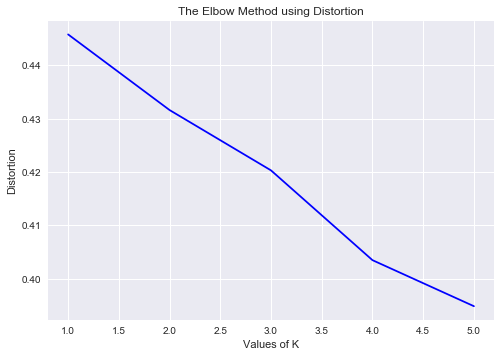

In [304]:

distortions = [] 
inertias = [] 
mapping1 = {} 
#mapping2 = {} 
K = range(1,6) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(NSW_grouped_clustering) 
    #kmeanModel.fit(NSW_grouped_clustering)     
      
    distortions.append(sum(np.min(cdist(NSW_grouped_clustering, kmeanModel.cluster_centers_, 
                    'euclidean'),axis=1)) / NSW_grouped_clustering.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    #mapping1[k] = sum(np.min(cdist(NSW_grouped_clustering, kmeanModel.cluster_centers_, 
                # 'euclidean'),axis=1)) / NSW_grouped_clustering.shape[0] 
    #mapping2[k] = kmeanModel.inertia_ 
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [290]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

NSW_merged = LGAs_selected_df

# merge NSW_grouped with NSW_data to add latitude/longitude for each neighborhood
NSW_merged = NSW_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')



In [291]:
NSW_merged=NSW_merged.dropna()
NSW_merged = NSW_merged.astype({"Cluster Labels": int})
NSW_merged.head(30) # check the last columns!

,Neighborhood,LocalGovernmentArea,GreaterSydney,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
618,Bass Hill,CANTERBURY-BANKSTOWN,Yes,-33.898625,150.997448,1,Fast Food Restaurant,Pizza Place,Discount Store,Big Box Store,Shopping Mall,Grocery Store,Gym,Supermarket,Falafel Restaurant,Filipino Restaurant
619,Yagoona,CANTERBURY-BANKSTOWN,Yes,-33.903791,151.017668,1,Gourmet Shop,Yoga Studio,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,Filipino Restaurant
620,Bankstown Aerodrome,CANTERBURY-BANKSTOWN,Yes,-33.923500,150.990100,1,Health Food Store,Yoga Studio,Event Space,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop
621,Villawood,CANTERBURY-BANKSTOWN,Yes,-33.885724,150.983751,2,Platform,Train Station,Electronics Store,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,Filipino Restaurant
622,Lansdowne (Canterbury-Bankstown - NSW),CANTERBURY-BANKSTOWN,Yes,-33.894869,150.974082,1,Lake,Yoga Studio,Farmers Market,Fountain,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish Market
623,Chullora,CANTERBURY-BANKSTOWN,Yes,-33.892500,151.047778,3,Café,Gym,Optical Shop,Lawyer,Yoga Studio,Falafel Restaurant,Food Court,Food & Drink Shop,Flower Shop,Flea Market
625,Milperra,CANTERBURY-BANKSTOWN,Yes,-33.938824,150.984642,1,Fried Chicken Joint,Golf Course,Food & Drink Shop,Chinese Restaurant,Thai Restaurant,Deli / Bodega,Dive Bar,Dog Run,Food Truck,Food Court
626,Revesby,CANTERBURY-BANKSTOWN,Yes,-33.943688,151.013719,0,Home Service,Italian Restaurant,Falafel Restaurant,Fountain,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish Market
627,Condell Park,CANTERBURY-BANKSTOWN,Yes,-33.922785,151.011314,1,Pizza Place,Mediterranean Restaurant,Grocery Store,Shopping Mall,Falafel Restaurant,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish Market
628,Bankstown,CANTERBURY-BANKSTOWN,Yes,-33.917190,151.033588,1,Vietnamese Restaurant,Café,Chinese Restaurant,Buffet,Steakhouse,Donut Shop,Fast Food Restaurant,Sports Bar,Discount Store,Portuguese Restaurant


In [292]:
NSW_merged.loc[NSW_merged['Cluster Labels'] == 0, NSW_merged.columns[[0] + list(range(5, NSW_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
626,Revesby,0,Home Service,Italian Restaurant,Falafel Restaurant,Fountain,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish Market
1121,Rookwood (NSW),0,Home Service,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,Filipino Restaurant


In [293]:
NSW_merged.loc[NSW_merged['Cluster Labels'] == 1, NSW_merged.columns[[0] + list(range(5, NSW_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
618,Bass Hill,1,Fast Food Restaurant,Pizza Place,Discount Store,Big Box Store,Shopping Mall,Grocery Store,Gym,Supermarket,Falafel Restaurant,Filipino Restaurant
619,Yagoona,1,Gourmet Shop,Yoga Studio,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,Filipino Restaurant
620,Bankstown Aerodrome,1,Health Food Store,Yoga Studio,Event Space,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop
622,Lansdowne (Canterbury-Bankstown - NSW),1,Lake,Yoga Studio,Farmers Market,Fountain,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish Market
625,Milperra,1,Fried Chicken Joint,Golf Course,Food & Drink Shop,Chinese Restaurant,Thai Restaurant,Deli / Bodega,Dive Bar,Dog Run,Food Truck,Food Court
627,Condell Park,1,Pizza Place,Mediterranean Restaurant,Grocery Store,Shopping Mall,Falafel Restaurant,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish Market
628,Bankstown,1,Vietnamese Restaurant,Café,Chinese Restaurant,Buffet,Steakhouse,Donut Shop,Fast Food Restaurant,Sports Bar,Discount Store,Portuguese Restaurant
629,Mount Lewis,1,Dessert Shop,Pastry Shop,Field,Lebanese Restaurant,Fast Food Restaurant,Yoga Studio,Farmers Market,Food Truck,Food Court,Food & Drink Shop
633,Panania,1,Bakery,Grocery Store,Train Station,Asian Restaurant,Fish & Chips Shop,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market
635,Picnic Point,1,Convenience Store,Diner,Business Service,Chinese Restaurant,Yoga Studio,Fast Food Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop


In [294]:
NSW_merged.loc[NSW_merged['Cluster Labels'] == 2, NSW_merged.columns[[0] + list(range(5, NSW_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
621,Villawood,2,Platform,Train Station,Electronics Store,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,Filipino Restaurant
634,East Hills,2,Platform,Park,Train Station,Yoga Studio,Event Space,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish Market
2947,Camellia,2,Train Station,Yoga Studio,Event Space,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop
2952,Pendle Hill,2,Platform,Hobby Shop,Convenience Store,Event Space,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop
2953,Cheltenham (NSW),2,Platform,Train Station,Tennis Court,Yoga Studio,Event Space,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish Market


In [295]:
NSW_merged.loc[NSW_merged['Cluster Labels'] == 3, NSW_merged.columns[[0] + list(range(5, NSW_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
623,Chullora,3,Café,Gym,Optical Shop,Lawyer,Yoga Studio,Falafel Restaurant,Food Court,Food & Drink Shop,Flower Shop,Flea Market
630,Punchbowl (Canterbury-Bankstown - NSW),3,Café,Pastry Shop,Park,Yoga Studio,Falafel Restaurant,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish Market
631,Padstow,3,Middle Eastern Restaurant,Dessert Shop,Park,Café,Thai Restaurant,Farmers Market,Food Truck,Food Court,Food & Drink Shop,Flower Shop
632,Padstow Heights,3,Bus Stop,Waterfront,Cosmetics Shop,Snack Place,Café,Yoga Studio,Falafel Restaurant,Food & Drink Shop,Flower Shop,Flea Market
636,Revesby Heights,3,Café,Yoga Studio,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop
641,Clemton Park,3,Café,Shopping Plaza,Grocery Store,Yoga Studio,Falafel Restaurant,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish Market
643,Kingsgrove,3,Café,Supermarket,Vietnamese Restaurant,Trail,Gym,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Yoga Studio
644,Riverwood,3,Bakery,Gym / Fitness Center,Coffee Shop,Vietnamese Restaurant,Café,Train Station,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant
647,Narwee,3,Bakery,Pub,Pizza Place,Café,Convenience Store,Train Station,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant
1132,Guildford West,3,Home Service,Dessert Shop,Café,Farmers Market,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish Market


In [296]:
NSW_merged.loc[NSW_merged['Cluster Labels'] == 4, NSW_merged.columns[[0] + list(range(5, NSW_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [297]:
NSW_merged.loc[NSW_merged['Cluster Labels'] == 5, NSW_merged.columns[[0] + list(range(5, NSW_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [298]:
NSW_merged.loc[NSW_merged['Cluster Labels'] == 6, NSW_merged.columns[[0] + list(range(5, NSW_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [217]:
#Read INCOME FIle


df_IncomeDist=pd.read_excel(dataset_path+ r'\Income_Distribution2016_17_ABS.xls',sheet_name = 'LGA Table 2f.5',header=6)
#df_IncomeDist.drop([0,1],axis =0, inplace = True) #drop first two rows with unwanted data


# # Get names of indexes for which column Mean has value np
# indexNames = df_IncomeDist[df_IncomeDist['Mean'] =='np' ].index

# # Delete these row indexes from dataFrame
# df_IncomeDist.drop(indexNames , inplace=True)

#df_IncomeDist.dropna()
df_IncomeDist.sort_values("Income share Top 10%",axis=0,ascending=False,inplace=True)
df_IncomeDist.head(30)

,LGA,LocalGovernmentArea,Earners,Median age of earners,Sum,Median,Mean,P80/P20,P80/P50,P20/P50,P10/P50,Gini coefficient,Income share Top 1%,Income share Top 5%,Income share Top 10%,Lowest Quartile,Second Quartile,Third Quartile,Highest Quartile
1,15350,MOSMAN,20412,47,3298746910,73822,161608,7.72,2.47,0.32,0.14,0.664,21.0,42.1,54.6,19.4,16.6,17.6,46.4
0,18500,WOOLLAHRA,39563,44,6211325715,75084,156998,6.90,2.34,0.34,0.17,0.655,22.6,42.5,54.2,18.3,16.5,18.4,46.8
3,14100,HUNTERS HILL,8495,48,1134953724,69778,133603,7.76,2.43,0.31,0.15,0.629,18.6,37.8,49.8,20.7,17.6,17.2,44.6
8,14500,KU-RING-GAI,78990,48,8402149625,59116,106370,8.17,2.47,0.30,0.12,0.603,14.8,32.8,45.4,24.9,18.6,17.1,39.3
6,18050,WAVERLEY,51139,37,5111483250,60566,99953,6.37,2.15,0.34,0.17,0.577,15.6,32.6,44.1,22.1,19.6,20.2,38.0
98,17900,WALGETT,2537,44,158296996,40926,62395,5.47,1.94,0.35,0.15,0.577,15.1,33.7,44.1,29.8,27.9,23.5,18.8
9,18250,WILLOUGHBY,49031,43,4842913790,58964,98772,7.35,2.32,0.32,0.13,0.580,13.7,30.8,43.2,24.2,19.0,18.6,38.2
4,14700,LANE COVE,24753,41,2621297950,68030,105898,5.91,2.08,0.35,0.16,0.551,12.8,29.8,41.7,19.3,17.4,20.9,42.4
16,15990,NORTHERN BEACHES,171617,45,14873713252,55499,86668,5.84,2.11,0.36,0.17,0.549,13.6,29.3,41.1,22.6,21.8,21.7,33.9
2,15950,NORTH SYDNEY,50922,40,5550871332,73016,109007,5.53,1.99,0.36,0.17,0.537,14.0,29.5,40.5,17.9,16.6,20.3,45.2


In [254]:
##For Inferential Statistic
##define the dataframe columns
column_names = ['LocalGovernmentArea', 'Population density 2018 persons/km2', 'Income share Top 10%','CrimeRateTotal'] 

# instantiate the dataframe////df_population////df_IncomeDist//df_crime_new

df_population_corr=df_population.filter(['LocalGovernmentArea','Population density 2018 persons/km2'],axis=1)
df_income_corr=df_IncomeDist.filter(['LocalGovernmentArea','Income share Top 10%','Mean','Median'],axis=1)
df_crime_corr=df_crime_new.filter(['LocalGovernmentArea','CrimeRateTotal'])

correlationchk_DF=df_population_corr.merge(df_income_corr) 
correlationchk_DF=correlationchk_DF.merge(df_crime_corr)
correlationchk_DF.rename(columns={ correlationchk_DF.columns[3]: "MeanIncome($)"}, inplace=True)

correlationchk_DF.sort_values('CrimeRateTotal',ascending=False, inplace =True)

##removing data from LGAs with less than 500 persons/km2
indexNames = correlationchk_DF[correlationchk_DF['Population density 2018 persons/km2'] < 500 ].index
correlationchk_DF.drop(indexNames , inplace=True)# Delete these row indexes from dataFrame

correlationchk_DF.head(30)

,LocalGovernmentArea,Population density 2018 persons/km2,Income share Top 10%,MeanIncome($),Median,CrimeRateTotal
5,SYDNEY,8982.9,40.1,76120,50289,7569.9
17,NEWCASTLE,878.7,31.9,63594,50518,5973.2
11,PENRITH,516.9,26.2,59779,53200,4232.4
1,BLACKTOWN,1526.9,26.1,57581,51422,4140.3
16,CAMPBELLTOWN,539.1,25.2,54137,49354,3879.8
34,WAVERLEY,7926.0,44.1,99953,60566,3372.4
8,LIVERPOOL,730.4,26.7,56250,49398,3263.0
4,PARRAMATTA,2997.9,29.9,60564,49615,3178.7
53,BURWOOD,5595.6,34.7,56363,40811,3022.0
6,CUMBERLAND,3310.8,28.2,49159,41083,2714.7


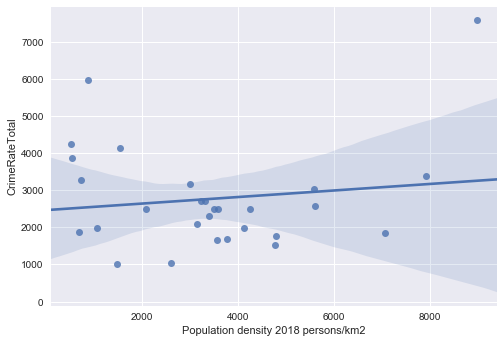

In [255]:
ax_regxPlot = sns.regplot(x='Population density 2018 persons/km2', y='CrimeRateTotal', data=correlationchk_DF)#MeanIncome($) Population density 2018 persons/km2
plt.show()

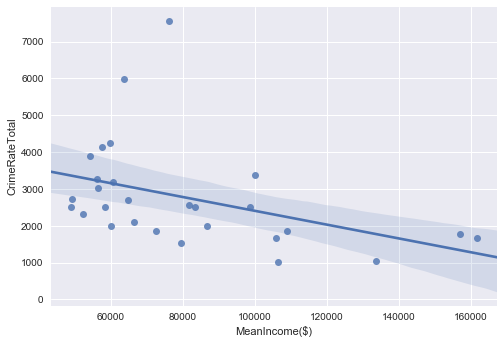

In [305]:
ax_regxPlot = sns.regplot(x='MeanIncome($)', y='CrimeRateTotal', data=correlationchk_DF)#MeanIncome($) Population density 2018 persons/km2
plt.show()

In [247]:
from sklearn.linear_model import LinearRegression
X = correlationchk_DF[['Population density 2018 persons/km2']]
Y = correlationchk_DF['TotalCrimes']
lm = LinearRegression()

lm.fit(X,Y)

yhat=lm.predict(10000)
print('Estimated crimerate for $20000: ',yhat)
print('R^2 Score for linear regression : ', lm.score(X, Y))

Estimated crimerate for $20000:  [ 1303.29649926]
R^2 Score for linear regression :  0.0680582495768


In [49]:
# download countries geojson file
#!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
# Read goejson file for NSW LGA
nswLGA_geo = dataset_path+ r'\NSW_LGA.json'

# url = "https://data.gov.au/geoserver/nsw-local-government-areas/wfs?request=GetFeature&typeName=ckan_f6a00643_1842_48cd_9c2f_df23a3a1dc1e&outputFormat=json"
# resp = requests.get(url)
# nswLGA_geo = json.loads(resp.text)
print('geojson data loaded')



geojson data loaded


In [ ]:
# Create map of NSW state with Councils using latitude and longitude values
map_NSWCouncils = folium.Map(location=[latitude, longitude], zoom_start=8)


# add markers to map
for lat, lng, council in zip(LGA_df['Latitude'], LGA_df['Longitude'], LGA_df['LocalGovernmentArea']):
    label = '{}'.format(council)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.6,
        parse_html=False).add_to(map_NSWCouncils) 
    
map_NSWCouncils

In [101]:
# Create map of GreaterSydney Suburbs with Councils using latitude and longitude values
map_NSWSuburbs = folium.Map(location=[latitude, longitude], zoom_start=8)


# add markers to map
for lat, lng, suburb in zip(suburb_df_greatersyd['Latitude'], suburb_df_greatersyd['Longitude'], suburb_df_greatersyd['Suburb']):
    label = '{}'.format(suburb)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        geo_data=nswLGA_geo,
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.6,
        parse_html=False).add_to(map_NSWSuburbs) 
    
map_NSWSuburbs

In [257]:
# Create map of GreaterSydney Suburbs in LGAs of our concern using latitude and longitude values
map_NSW_SelectedSuburbs = folium.Map(location=[latitude, longitude], zoom_start=10)


# add markers to map
for lat, lng, suburb in zip(LGAs_selected_df['Latitude'], LGAs_selected_df['Longitude'], LGAs_selected_df['Neighborhood']):
    label = '{}'.format(suburb)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        geo_data=nswLGA_geo,
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.6,
        parse_html=False).add_to(map_NSW_SelectedSuburbs) 
    
map_NSW_SelectedSuburbs

In [299]:
# create map with clustering effects
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(NSW_merged['Latitude'], NSW_merged['Longitude'], NSW_merged['Neighborhood'], NSW_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        geo_data=nswLGA_geo,
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [229]:
## Plot Income Distribution
#bins = list(df_IncomeDist['Mean'].quantile([0, 0.25, 0.5, 0.7,0.8, 0.85, 0.9,0.95,0.97,1]))
map_NSW_SelectedLGAs = folium.Map(location=[latitude, longitude], zoom_start=9)

map_NSW_SelectedLGAs.choropleth(
    #geo_data={"type":nswLGA_geo["type"],"features":nswLGA_geo["features"][:50]},
    geo_data=nswLGA_geo,
    data=df_IncomeDist,#df_population   df_crime_new  df_IncomeDist
    columns=['LocalGovernmentArea', 'Mean'], ## Mean ; Income share Top 10%
    key_on='feature.properties.nsw_lga__3',
    fill_color='YlOrRd',
    fill_opacity=0.5,
    line_opacity=0.2,
    legend_name='Mean Income($)',
    #bins=[35000,45000,55000,75000,100000,130000,200000],
    nan_fill_opacity=0.3,
    nan_fill_color='gray'
    
)#.add_to(nsw_map)
# add LGA markers to map
for lat, lng, lga in zip(Selected_Councils_df['Latitude'], Selected_Councils_df['Longitude'], Selected_Councils_df['LocalGovernmentArea']):
    label = '{}'.format(lga)
    label = folium.Popup(label, parse_html=True,show=True)
    folium.CircleMarker(
        [lat, lng],
        geo_data=nswLGA_geo,
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3176cc',
        fill_opacity=0.6,
        parse_html=False).add_to(map_NSW_SelectedLGAs) 
# display map
#map_NSW_SelectedLGAs ##Unselect to View Map

C:\Users\riaz\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [199]:

## Population Density

#bins = list(df_population['Population density 2018 persons/km2'].quantile([0, 0.25, 0.5, 0.7,0.8, 0.85, 0.9,0.95,0.97,1]))

map_NSW_SelectedLGAs = folium.Map(location=[latitude, longitude], zoom_start=9)

map_NSW_SelectedLGAs.choropleth(
    #geo_data={"type":nswLGA_geo["type"],"features":nswLGA_geo["features"][:50]},
    geo_data=nswLGA_geo,
    data=df_population,#df_population   df_crime_new  df_IncomeDist
    columns=['LocalGovernmentArea', 'Population density 2018 persons/km2'], #Population density 2018 persons/km2
    key_on='feature.properties.nsw_lga__3',
    fill_color='YlOrRd',
    fill_opacity=0.5,
    line_opacity=0.2,
    legend_name='Population Density ppl/km2',
    #bins=bins,
    nan_fill_opacity=0.3,
    nan_fill_color='gray'
    
)#.add_to(nsw_map)
# add LGA markers to map
for lat, lng, lga in zip(Selected_Councils_df['Latitude'], Selected_Councils_df['Longitude'], Selected_Councils_df['LocalGovernmentArea']):
    label = '{}'.format(lga)
    label = folium.Popup(label, parse_html=True,show=True)
    folium.CircleMarker(
        [lat, lng],
        geo_data=nswLGA_geo,
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3176cc',
        fill_opacity=0.6,
        parse_html=False).add_to(map_NSW_SelectedLGAs) 
    


# display map
#map_NSW_SelectedLGAs ##Unselect to View Map


C:\Users\riaz\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [250]:
# Crime Data
# Create map of GreaterSydney Councils our concern using latitude and longitude values
map_NSW_SelectedLGAs = folium.Map(location=[latitude, longitude], zoom_start=10)

map_NSW_SelectedLGAs.choropleth(
    #geo_data={"type":nswLGA_geo["type"],"features":nswLGA_geo["features"][:50]},
    geo_data=nswLGA_geo,
    data=df_crime_new,#df_population   df_crime_new  df_IncomeDist
    columns=['LocalGovernmentArea', 'CrimeRateTotal'], #Violence_Assaul+BreakingandEntering+Robbery_Stealing TotalCrimes
    key_on='feature.properties.nsw_lga__3',
    fill_color='YlOrRd',
    fill_opacity=0.5,
    line_opacity=0.2,
    legend_name='Overall_CrimeRate (per 100,000 ppl)',
    #bins=[0,400,900,2000,2500,3000,3500,4000,5000,8000],
    nan_fill_opacity=0.3,
    nan_fill_color='gray'
    
)#.add_to(nsw_map)

# add LGA markers to map
for lat, lng, lga in zip(Selected_Councils_df['Latitude'], Selected_Councils_df['Longitude'], Selected_Councils_df['LocalGovernmentArea']):
    label = '{}'.format(lga)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        geo_data=nswLGA_geo,
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3176cc',
        fill_opacity=0.6,
        parse_html=False).add_to(map_NSW_SelectedLGAs) 
    




# display map
#map_NSW_SelectedLGAs ##Unselect to View Map

C:\Users\riaz\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
